# **Import**

In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
import warnings as wr 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

wr.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Iris.csv')

In [38]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# **EDA**

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df.shape

(150, 5)

In [41]:
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df.describe(include='object')

,species
count,150
unique,3
top,setosa
freq,50


## **Duplicated Value**

In [45]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [46]:
duplicated_data = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(duplicated_data)

3


In [47]:
(df.isnull().sum()/len(df)) * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

## **Missing Values**

In [48]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**0 Missing Value**

## **Visualize the data**

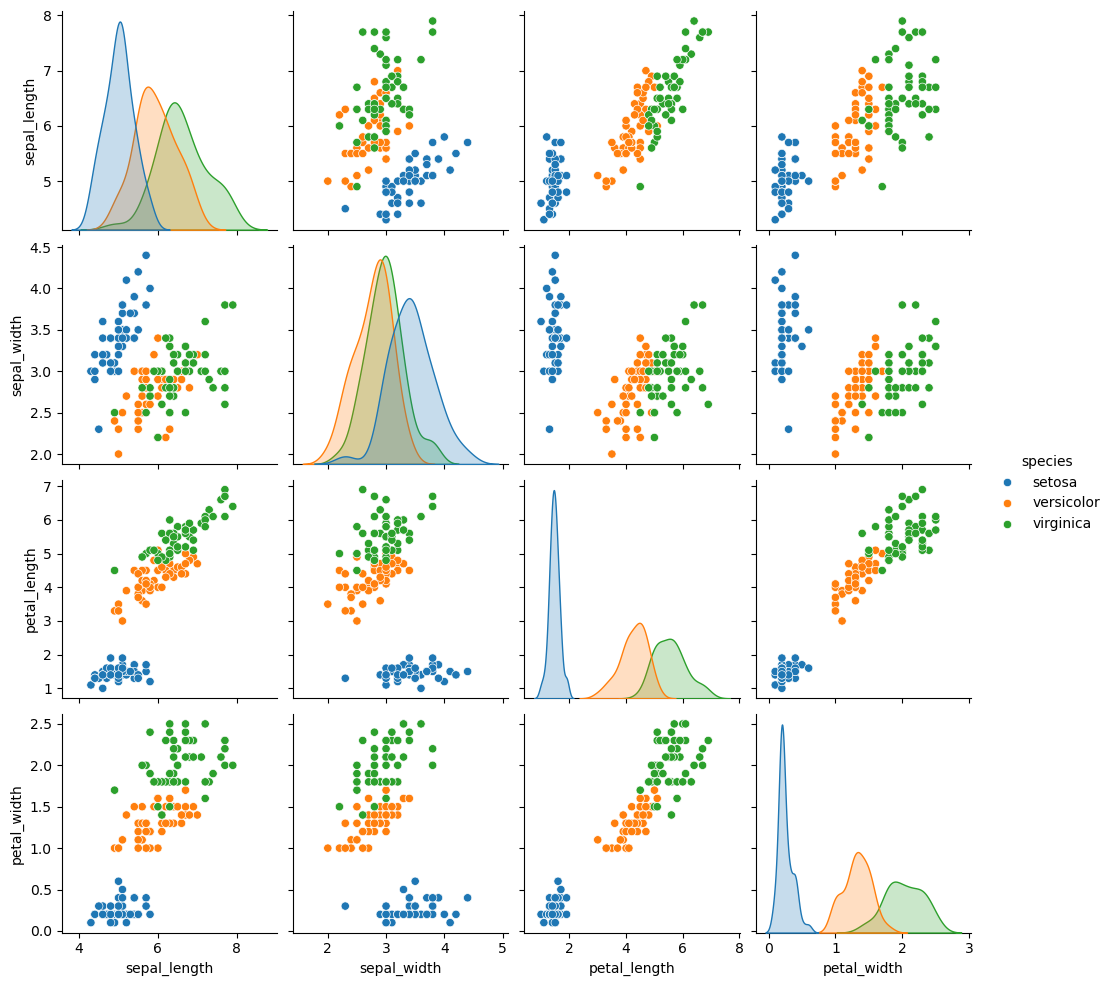

In [49]:
sns.pairplot(df, vars=[
    'sepal_length', 'sepal_width', 
    'petal_length', 'petal_width'], 
    hue='species'
)
plt.show()

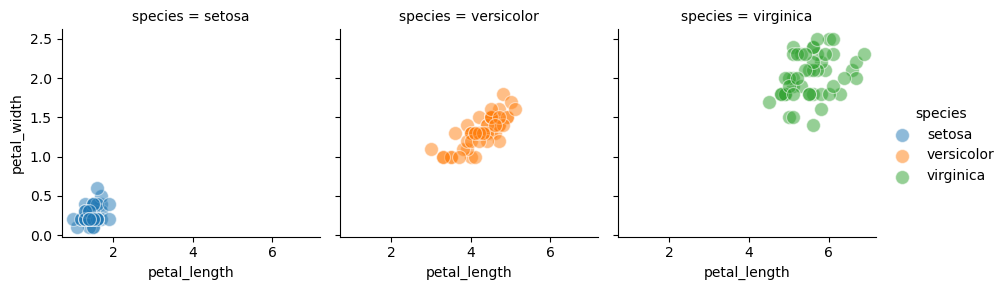

In [50]:
g = sns.FacetGrid(
    data=df,
    col='species',
    hue='species'
)
g.map(sns.scatterplot, "petal_length", "petal_width", s=100, alpha=.5)
g.add_legend()
plt.show()

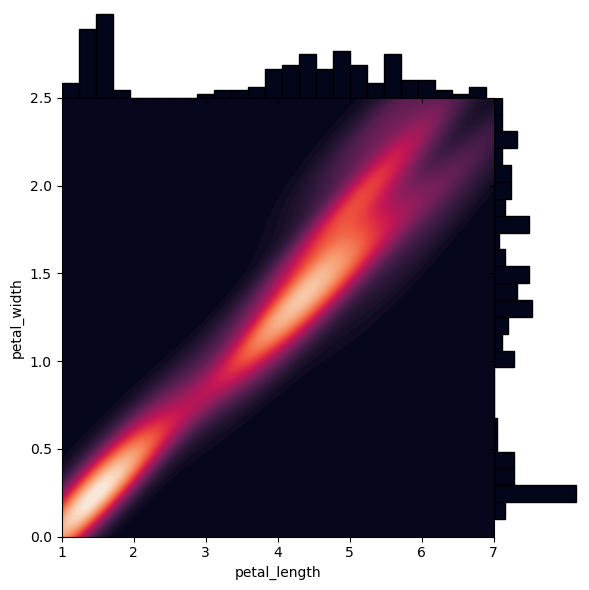

In [51]:
g = sns.JointGrid(data=df, x="petal_length", y="petal_width", space=0)

g.plot_joint(
    sns.kdeplot,
    fill=True,
    clip=((1, 7), (0, 2.5)),  
    thresh=0,
    levels=100,
    cmap="rocket"
)

g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

plt.show()

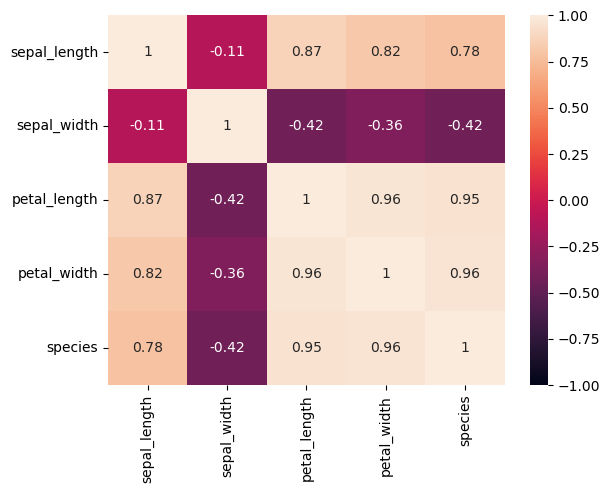

In [56]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

## **Preprocessing**

In [52]:
le = LabelEncoder()
feature_le = df['species']
df['species'] = le.fit_transform(df['species'])

In [53]:
for i, cls in enumerate(le.classes_):
    print(i, "→", cls)

0 → setosa
1 → versicolor
2 → virginica


In [54]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
df.sample(5, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,2
53,5.5,2.3,4.0,1.3,1
140,6.7,3.1,5.6,2.4,2
19,5.1,3.8,1.5,0.3,0
106,4.9,2.5,4.5,1.7,2


## **Scaling** 

In [58]:
scaler = StandardScaler()
feature_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
df[feature_scale] = scaler.fit_transform(df[feature_scale])

# **Train and Test The Model**

In [61]:
X = df.drop(columns=['species'])
y = df['species']

In [62]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.335700
1,-1.157560,-0.128082,-1.357737,-1.335700
2,-1.399610,0.331139,-1.414778,-1.335700
3,-1.520635,0.101529,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682
146,0.536792,-1.276136,0.695748,0.915085
147,0.778842,-0.128082,0.809831,1.047484
148,0.415766,0.790361,0.923913,1.444682


In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [66]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
137,0.657817,0.101529,0.980954,0.782686
47,-1.520635,0.331139,-1.357737,-1.335700
121,-0.310384,-0.587304,0.638707,1.047484
27,-0.794484,1.019971,-1.300696,-1.335700
4,-1.036535,1.249582,-1.357737,-1.335700
...,...,...,...,...
73,0.294741,-0.587304,0.524624,-0.011709
108,1.020892,-1.276136,1.152078,0.782686
14,-0.068334,2.168025,-1.471819,-1.335700
94,-0.310384,-0.816914,0.239418,0.120690


In [67]:
y_train

137    2
47     0
121    2
27     0
4      0
      ..
73     1
108    2
14     0
94     1
104    2
Name: species, Length: 117, dtype: int64

## **Logistic Regression**

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_pred = logreg.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


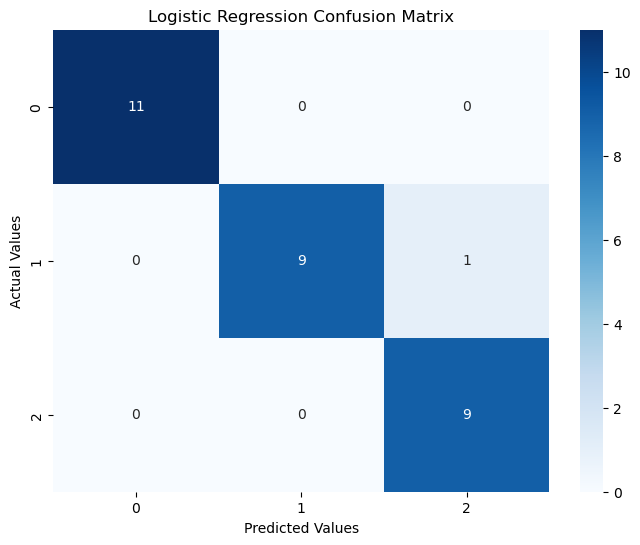

In [105]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## **Decision Tree Classifier**

In [106]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
y_pred = dectree.predict(X_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [108]:
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Decision Tree: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


## **KNeighbors Classifier**

In [109]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [111]:
print("Accuracy of KNN:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of KNN: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## **SVM**

In [113]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [114]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# **Test Result**

In [177]:
new_data = pd.DataFrame({
    'sepal_length': [5.0, 6.3, 4.8, 6.8, 5.4],
    'sepal_width':  [3.4, 3.3, 3.1, 2.8, 3.7],
    'petal_length': [1.5, 5.1, 1.4, 5.9, 1.7],
    'petal_width':  [0.2, 2.0, 0.2, 2.1, 0.4]
})
new_data_scaled = scaler.transform(new_data)

In [178]:
predictions = logreg.predict(new_data_scaled)
print("Predicted classes (Logistic Regression):", predictions)

Predicted classes (Logistic Regression): [0 2 0 2 0]


In [179]:
y_true_new = [0, 2, 0, 2, 0]

accuracy_new = accuracy_score(y_true_new, predictions)
cm = confusion_matrix(y_true_new, predictions)

print("Predicted classes:", predictions)
print("Accuracy on new test data:", accuracy_new)
print("Confusion Matrix:\n", cm)

Predicted classes: [0 2 0 2 0]
Accuracy on new test data: 1.0
Confusion Matrix:
 [[3 0]
 [0 2]]


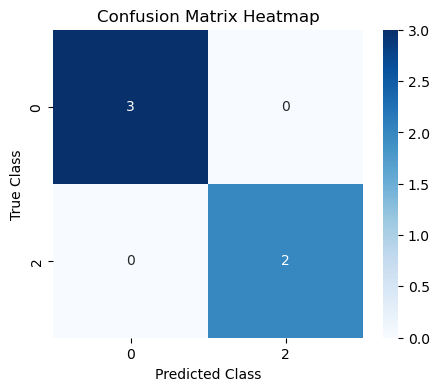

In [181]:
cm = confusion_matrix(y_true_new, predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,2], yticklabels=[0,2])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.show()